import arcpy

## How to Clone from Portal for ArcGIS to ArcGIS Online or vice versa

Procedure:

1. 






In [18]:
from arcgis.gis import GIS

In [2]:
gis = GIS("pro")

In [20]:
gis = GIS("https://www.arcgis.com", "MatsuzakiEiji", "timberland56789")

In [21]:
user = gis.users.get('MatsuzakiEiji')

In [22]:
user

<User username:MatsuzakiEiji>

In [6]:
from IPython.display import display

In [25]:
items = gis.content.search('Parcellary')

<Item title:"01-Status_NVS2_PaymentProcessing" type:Web Map owner:MatsuzakiEiji>

<Item title:"01-Status_Properties for Acquisition" type:Web Map owner:MatsuzakiEiji>

<Item title:"Parcellary_Status" type:Feature Layer Collection owner:MatsuzakiEiji>
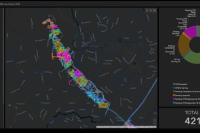

In [26]:
for item in items[:3]:
    display(item)

In [9]:
map = gis.map()

In [27]:
map.add_layer(items[2].layers[0])

In [29]:
mygis = GIS("https://arcgis.com", "eijimatsuzaki1", "timberland12345")

In [30]:
mygis

GIS @ https://EMJ.maps.arcgis.com version:8.2

In [31]:
itemMygis = mygis.content.search("Rail Sector")

<Item title:"Rail Sector Maps_WFL1" type:Service Definition owner:eijimatsuzaki1>
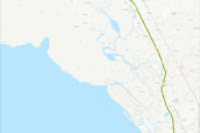

<Item title:"Rail Sector Maps" type:Dashboard owner:eijimatsuzaki1>
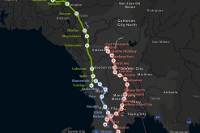

<Item title:"Rail Sector Maps_WFL1" type:Feature Layer Collection owner:eijimatsuzaki1>
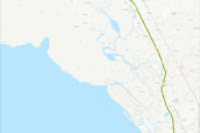

In [32]:
for itemG in itemMygis[:3]:
    display(itemG)

In [35]:
gisP = GIS("https://mmspgc-gis.mmspgc.local/portal", "matsuzakieiji", "timberland12345", verify_cert=False)

In [36]:
gisP

GIS @ https://mmspgc-gis.mmspgc.local/portal version:7.1

In [38]:
my_content = gis.content.search(query="owner:" + gis.users.me.username,
                               item_type="Feature Layer",
                               max_items=15) 

In [41]:
my_content

[<Item title:"Parcellary_Status" type:Feature Layer Collection owner:MatsuzakiEiji>, <Item title:"Civil_EIJI_sampleViaduct" type:Feature Layer Collection owner:MatsuzakiEiji>, <Item title:"D_Wall" type:Feature Layer Collection owner:MatsuzakiEiji>, <Item title:"sampleViaductMerged" type:Feature Layer Collection owner:MatsuzakiEiji>]

In [40]:
import os
import datetime as dt
import pandas

In [42]:
day_start = dt.datetime(2020, 5, 30, 0, 0, 0, 0)
day_end = dt.datetime(2020, 7, 30, 0, 0, 0, 0)

In [43]:
start_timestamp = int(day_start.timestamp()*1000)
end_timestamp = int(day_end.timestamp()*1000)

In [44]:
content_published = [item for item in gis.content.search(query="* AND \owner:" + gis.users.me.username,
                                                        max_items=50) if item.created > start_timestamp and item.created < end_timestamp]

In [45]:
content_published

[<Item title:"01-Status_NVS2_PaymentProcessing" type:Web Map owner:MatsuzakiEiji>, <Item title:"01-Status_Properties for Acquisition" type:Web Map owner:MatsuzakiEiji>, <Item title:"Parcellary_Status" type:Feature Layer Collection owner:MatsuzakiEiji>, <Item title:"Civil_EIJI_sampleViaduct" type:Service Definition owner:MatsuzakiEiji>, <Item title:"sampleViaductMerged" type:Scene Layer owner:MatsuzakiEiji>, <Item title:"Civil_EIJI_sampleViaduct" type:Feature Layer Collection owner:MatsuzakiEiji>, <Item title:"sampleViaductMerged" type:Feature Layer Collection owner:MatsuzakiEiji>, <Item title:"Parcellary_Status" type:Service Definition owner:MatsuzakiEiji>, <Item title:"01-Status_NVS" type:Web Map owner:MatsuzakiEiji>, <Item title:"Civil_EIJI_sampleViaduct" type:Scene Layer owner:MatsuzakiEiji>, <Item title:"sampleViaductMerged" type:Service Definition owner:MatsuzakiEiji>, <Item title:"01-Status_NVS" type:Dashboard owner:MatsuzakiEiji>]

In [46]:
def readable_date(portal_stamp):
    return dt.datetime.fromtimestamp(portal_stamp/1000).strftime('%B %d %Y at %I:%M.%S %p')

In [48]:
title = "Item Title"
item_type = "Item Type"
publish = "Published"
print(f"{title:40}{item_type:25}{publish:40}")

for content in content_published:
    print(f"{content.title:<40}{content.type:25}{readable_date(content.created):40}")

Item Title                              Item Type                Published                               
01-Status_NVS2_PaymentProcessing        Web Map                  July 21 2020 at 10:35.55 AM             
01-Status_Properties for Acquisition    Web Map                  July 21 2020 at 10:35.58 AM             
Parcellary_Status                       Feature Service          July 21 2020 at 10:58.56 AM             
Civil_EIJI_sampleViaduct                Service Definition       July 08 2020 at 11:27.39 PM             
sampleViaductMerged                     Scene Service            July 12 2020 at 06:02.15 PM             
Civil_EIJI_sampleViaduct                Feature Service          July 08 2020 at 11:27.42 PM             
sampleViaductMerged                     Feature Service          July 12 2020 at 06:01.19 PM             
Parcellary_Status                       Service Definition       July 21 2020 at 10:58.52 AM             
01-Status_NVS                           Web Ma

In [50]:
search_result = gis.content.search(query="owner: MatsuzakiEiji", item_type="Feature *")
search_result

[<Item title:"Parcellary_Status" type:Feature Layer Collection owner:MatsuzakiEiji>, <Item title:"Civil_EIJI_sampleViaduct" type:Feature Layer Collection owner:MatsuzakiEiji>, <Item title:"sampleViaductMerged" type:Feature Layer Collection owner:MatsuzakiEiji>, <Item title:"D_Wall" type:Feature Layer Collection owner:MatsuzakiEiji>]

In [53]:
search_content = gis.content.search(query="", item_type="Scene Layer")
search_content

[<Item title:"sampleViaductMerged" type:Scene Layer owner:MatsuzakiEiji>, <Item title:"D_Wall" type:Scene Layer owner:MatsuzakiEiji>, <Item title:"Civil_EIJI_sampleViaduct" type:Scene Layer owner:MatsuzakiEiji>]

<Item title:"01-Status_Properties for Acquisition" type:Web Map owner:MatsuzakiEiji>
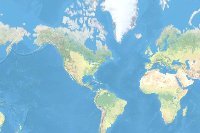

In [54]:
item1 = gis.content.get("611502980f004be8b3071b518cdca421")
item1

In [56]:
item1.title

'01-Status_Properties for Acquisition'

In [57]:
item1.tag

AttributeError: 'Item' object has no attribute 'tag'

In [58]:
item1.tags

['Parcellary', 'Land Acquisition', 'Web Map']

In [60]:
item1.update(item_properties={'tags':'Parcellary, Land Acquisition, Web Map, LAR'})

True

In [61]:
item1.tags

['Parcellary', 'Land Acquisition', 'Web Map', 'LAR']

In [62]:
item1.dependent_upon()

{'total': 0, 'start': 1, 'num': 0, 'nextStart': -1, 'list': []}

In [73]:
from pathlib import Path
import sys

from arcgis.gis import GIS, Item
from arcgis.env import active_gis
from arcgis.features import FeatureLayerCollection
from arcgis.mapping import WebMap

In [74]:
# Source: the Portal for ArcGIS
source = GIS("https://mmspgc-gis.mmspgc.local/portal", "matsuzakieiji", "timberland12345", verify_cert=False)
source

GIS @ https://mmspgc-gis.mmspgc.local/portal version:7.1

In [75]:
print(source)

GIS @ https://mmspgc-gis.mmspgc.local/portal version:7.1


In [82]:
# Target: ArcGIS Online
target = GIS("https://www.arcgis.com", "MatsuzakiEiji", "timberland56789")
print(target)

GIS @ https://mmsp.maps.arcgis.com version:8.2


<Item title:"GeoTechSpot" type:Feature Layer Collection owner:matsuzakieiji>
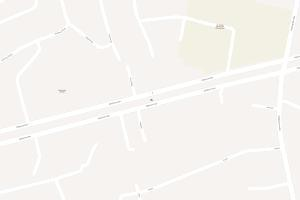

In [77]:
hosted_flyr = source.content.get("aae2ce08a9724807babd5e811b80f0dc")
hosted_flyr

In [78]:
hosted_flyr.url

'https://mmspgc-gis.mmspgc.local/server/rest/services/Hosted/GeoTechSpot/FeatureServer'

In [83]:
cloned_flyr = target.content.clone_items(items=[hosted_flyr], owner="MatsuzakiEiji")

In [85]:
cloned_flyr[0]

IndexError: list index out of range

In [72]:
cloned_flyr[0].url

'https://services7.arcgis.com/jcAkCSW40GDaQ1L6/arcgis/rest/services/GeoTechSpot/FeatureServer'